In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

email_df=pd.read_csv("data_analytics.csv",error_bad_lines=False,  encoding = "ISO-8859-1")#reading dataframe from csv file

b'Skipping line 212202: expected 37 fields, saw 38\n'
b'Skipping line 255163: expected 37 fields, saw 38\nSkipping line 258525: expected 37 fields, saw 38\nSkipping line 259516: expected 37 fields, saw 38\n'
b'Skipping line 266952: expected 37 fields, saw 38\n'
b'Skipping line 280432: expected 37 fields, saw 38\nSkipping line 280452: expected 37 fields, saw 38\nSkipping line 294791: expected 37 fields, saw 38\n'
b'Skipping line 307203: expected 37 fields, saw 38\n'
b'Skipping line 320017: expected 37 fields, saw 38\nSkipping line 325502: expected 37 fields, saw 38\n'
b'Skipping line 328300: expected 37 fields, saw 38\nSkipping line 332865: expected 37 fields, saw 38\nSkipping line 334114: expected 37 fields, saw 38\nSkipping line 334363: expected 37 fields, saw 38\n'
b'Skipping line 356334: expected 37 fields, saw 38\n'
b'Skipping line 366655: expected 37 fields, saw 38\n'
b'Skipping line 413217: expected 37 fields, saw 38\n'
b'Skipping line 428678: expected 37 fields, saw 38\nSkipping

In [4]:
email_df.head()


id_customer  id_agency_customer  id_message  id_send                 date  \
0            5                   0          10       41  2005-12-08 21:03:59   
1            3                   0          12      125  2006-01-24 01:53:44   
2            3                   0          12      126  2006-01-24 02:03:44   
3            3                   0          12      129  2006-02-18 15:13:01   
4            3                   0          12      130  2006-02-22 23:42:54   

                subject use_ab subject_b id_message_b ab_percentage  ...  \
0       Airfoil PR NEWS  False       NaN            0             0  ...   
1  XXXchatcams.com News  False       NaN            0             0  ...   
2  XXXchatcams.com News  False       NaN            0             0  ...   
3  XXXchatcams.com News  False       NaN            0             0  ...   
4  XXXchatcams.com News  False       NaN            0             0  ...   

  reads_a clicks_a  visits_a  conversions_a  sent_b  opens_b  reads_b  \
0     0.0      0.0       0.0            0.0     0.0      0.0      0.0   
1     0.0      0.0       0.0            0.0     0.0      0.0      0.0   
2     0.0      0.0       0.0            0.0     0.0      0.0      0.0   
3     0.0      0.0       0.0            0.0     0.0      0.0      0.0   
4     0.0      0.0       0.0            0.0     0.0      0.0      0.0   

   clicks_b  visits_b  conversions_b  
0       0.0       0.0            0.0  
1       0.0       0.0            0.0  
2       0.0       0.0            0.0  
3       0.0       0.0            0.0  
4       0.0       0.0            0.0  

[5 rows x 37 columns]

In [5]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567647 entries, 0 to 567646
Data columns (total 37 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id_customer         567647 non-null  int64  
 1   id_agency_customer  567647 non-null  int64  
 2   id_message          567647 non-null  int64  
 3   id_send             567647 non-null  int64  
 4   date                567647 non-null  object 
 5   subject             563140 non-null  object 
 6   use_ab              567644 non-null  object 
 7   subject_b           13686 non-null   object 
 8   id_message_b        567647 non-null  object 
 9   ab_percentage       567644 non-null  object 
 10  ab_evalution        13810 non-null   object 
 11  next_send           13746 non-null   object 
 12  sent                567647 non-null  float64
 13  bounced             567647 non-null  float64
 14  opens               567647 non-null  float64
 15  reads               567647 non-nul

In [11]:
email_df.subject.value_counts().head()

UpozornÄnÃ­ na novÃ© letÃ¡ky                                                                                                              19689
Nalezl jsem vÃ½robky podle VaÅ¡ich pÅedstav!                                                                                              18218
DokonÄete svÅ¯j nÃ¡kup[% IF '[Event.first_name]' !='' -%], [SKLONUJ 5,j,1][Event.first_name][/SKLONUJ][% END -%]. VÃ¡Å¡ koÅ¡Ã­k ÄekÃ¡    11720
BlahopÅejeme k svÃ¡tku                                                                                                                     9860
Topforex.com                                                                                                                                5764
Name: subject, dtype: int64

In [12]:
email_df.isna().mean()

id_customer           0.000000
id_agency_customer    0.000000
id_message            0.000000
id_send               0.000000
date                  0.000000
subject               0.007940
use_ab                0.000005
subject_b             0.975890
id_message_b          0.000000
ab_percentage         0.000005
ab_evalution          0.975672
next_send             0.975784
sent                  0.000000
bounced               0.000000
opens                 0.000000
reads                 0.000000
clicks                0.000000
visits                0.000000
conversions           0.000000
revenues              0.000000
prints                0.000000
previews              0.000000
forwards              0.000000
spam_reports          0.000000
unsubscribes          0.000000
sent_a                0.000000
opens_a               0.000000
reads_a               0.000000
clicks_a              0.000000
visits_a              0.000000
conversions_a         0.000000
sent_b                0.000000
opens_b 

In [13]:
email_df.columns

Index(['id_customer', 'id_agency_customer', 'id_message', 'id_send', 'date',
       'subject', 'use_ab', 'subject_b', 'id_message_b', 'ab_percentage',
       'ab_evalution', 'next_send', 'sent', 'bounced', 'opens', 'reads',
       'clicks', 'visits', 'conversions', 'revenues', 'prints', 'previews',
       'forwards', 'spam_reports', 'unsubscribes', 'sent_a', 'opens_a',
       'reads_a', 'clicks_a', 'visits_a', 'conversions_a', 'sent_b', 'opens_b',
       'reads_b', 'clicks_b', 'visits_b', 'conversions_b'],
      dtype='object')

In [18]:
email_new_df=email_df[[ 'date',
       'subject', 'use_ab', 'id_message_b', 'ab_percentage',
        'sent', 'bounced', 'opens', 'reads',
       'clicks', 'visits', 'conversions', 'revenues', 'prints', 'previews',
       'forwards', 'spam_reports', 'unsubscribes', 'sent_a', 'opens_a',
       'reads_a', 'clicks_a', 'visits_a', 'conversions_a', 'sent_b', 'opens_b',
       'reads_b', 'clicks_b', 'visits_b', 'conversions_b']]

In [19]:
email_new_df.head()

date               subject use_ab id_message_b  \
0  2005-12-08 21:03:59       Airfoil PR NEWS  False            0   
1  2006-01-24 01:53:44  XXXchatcams.com News  False            0   
2  2006-01-24 02:03:44  XXXchatcams.com News  False            0   
3  2006-02-18 15:13:01  XXXchatcams.com News  False            0   
4  2006-02-22 23:42:54  XXXchatcams.com News  False            0   

  ab_percentage  sent  bounced  opens  reads  clicks  ...  reads_a  clicks_a  \
0             0   0.0      0.0    0.0    0.0     0.0  ...      0.0       0.0   
1             0   0.0      0.0    0.0    0.0     0.0  ...      0.0       0.0   
2             0   0.0      0.0    0.0    0.0     0.0  ...      0.0       0.0   
3             0   0.0      0.0    0.0    0.0     0.0  ...      0.0       0.0   
4             0   0.0      0.0    0.0    0.0     0.0  ...      0.0       0.0   

   visits_a  conversions_a  sent_b  opens_b  reads_b  clicks_b  visits_b  \
0       0.0            0.0     0.0      0.0      0.0       0.0       0.0   
1       0.0            0.0     0.0      0.0      0.0       0.0       0.0   
2       0.0            0.0     0.0      0.0      0.0       0.0       0.0   
3       0.0            0.0     0.0      0.0      0.0       0.0       0.0   
4       0.0            0.0     0.0      0.0      0.0       0.0       0.0   

   conversions_b  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  

[5 rows x 30 columns]

In [27]:
import datetime
email_new_df['date']=pd.to_datetime(email_new_df['date'],errors='coerce')

In [45]:
email_new_df['date'].dt.year.unique()

array([2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014.,   nan, 2015., 2016., 2017., 2018.])

In [50]:
email_new_df['year']=email_new_df['date'].dt.year

In [53]:
email_new_df.head()

date               subject use_ab id_message_b ab_percentage  \
0 2005-12-08 21:03:59       Airfoil PR NEWS  False            0             0   
1 2006-01-24 01:53:44  XXXchatcams.com News  False            0             0   
2 2006-01-24 02:03:44  XXXchatcams.com News  False            0             0   
3 2006-02-18 15:13:01  XXXchatcams.com News  False            0             0   
4 2006-02-22 23:42:54  XXXchatcams.com News  False            0             0   

   sent  bounced  opens  reads  clicks  ...  visits_a  conversions_a  sent_b  \
0   0.0      0.0    0.0    0.0     0.0  ...       0.0            0.0     0.0   
1   0.0      0.0    0.0    0.0     0.0  ...       0.0            0.0     0.0   
2   0.0      0.0    0.0    0.0     0.0  ...       0.0            0.0     0.0   
3   0.0      0.0    0.0    0.0     0.0  ...       0.0            0.0     0.0   
4   0.0      0.0    0.0    0.0     0.0  ...       0.0            0.0     0.0   

   opens_b  reads_b  clicks_b  visits_b  conversions_b    year  month  
0      0.0      0.0       0.0       0.0            0.0  2005.0   12.0  
1      0.0      0.0       0.0       0.0            0.0  2006.0    1.0  
2      0.0      0.0       0.0       0.0            0.0  2006.0    1.0  
3      0.0      0.0       0.0       0.0            0.0  2006.0    2.0  
4      0.0      0.0       0.0       0.0            0.0  2006.0    2.0  

[5 rows x 32 columns]

In [52]:
email_new_df['month']=email_new_df['date'].dt.month

In [ ]:
email_new_df['month']=email_new_df['date'].dt.month

In [67]:
import matplotlib.pyplot as plt
email_open_df=pd.DataFrame(email_new_df.groupby('year')['opens'].sum())


In [69]:
email_open_df['year']=email_new_df.groupby('year').groups.keys()


In [70]:
email_open_df

year
2005.0                                                    0
2006.0                                                    0
2007.0                                                    0
2008.0                                                    0
2009.0                                                    0
2010.0                                                    0
2011.0                                                   11
2012.0                                                 2334
2013.0                                                16163
2014.0                                               102626
2015.0                                          2.92977e+07
2016.0                                          7.03747e+07
2017.0                                          1.25872e+08
2018.0                                          4.84343e+07
year      (2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010....
Name: opens, dtype: object

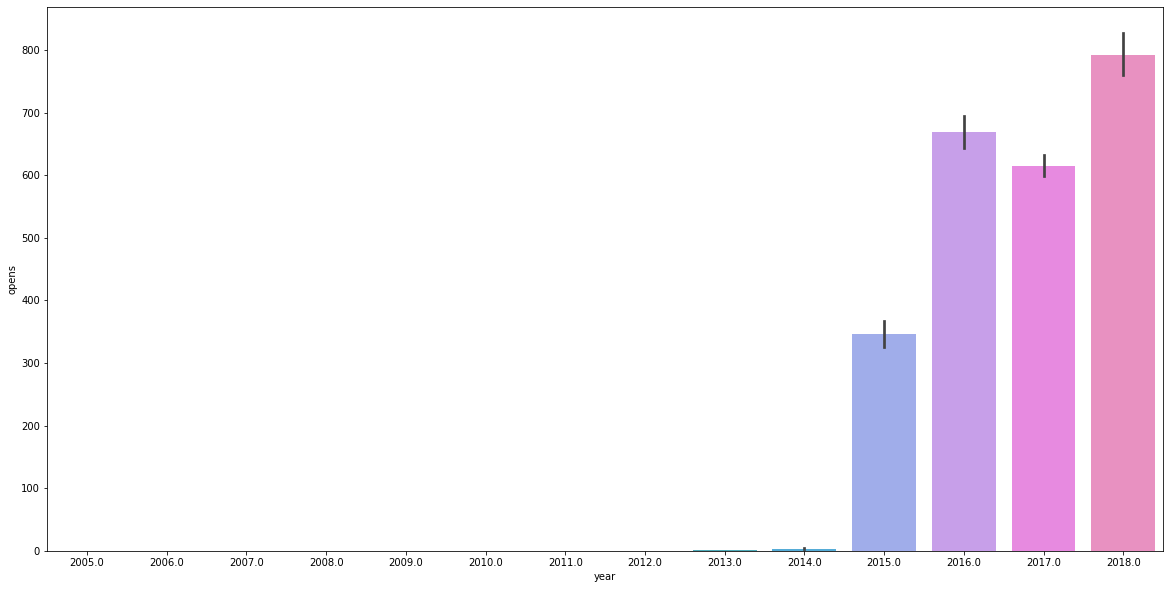

In [73]:
plt.figure(figsize=(20,10))
sns.barplot(x='year',y='opens',data=email_new_df)